# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [27]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [28]:
# Your code here
df = pd.read_csv('data/ames.csv',index_col=0)
shape =df.shape

print(df.to_string()) 
# print(shape)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
Id                                                                                                       

The following code checks that you loaded the data correctly:

In [29]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [30]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [31]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

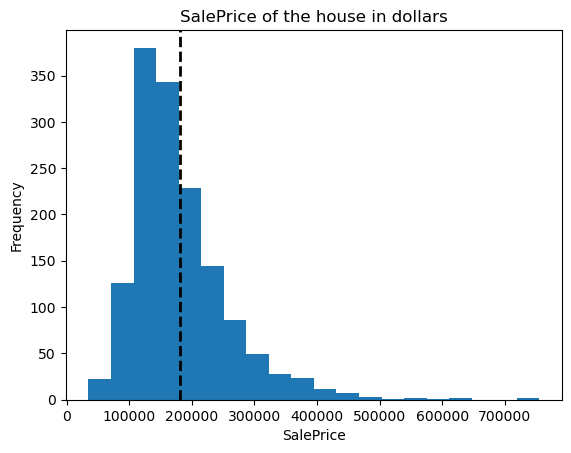

In [32]:
x = df.SalePrice
plt.hist(x, bins=20)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('SalePrice of the house in dollars')
plt.axvline(x.mean(),color='black',linestyle='dashed',linewidth=2)
plt.show()


Now, print out the mean, median, and standard deviation:

In [41]:
# Your code here
# Importing the NumPy module
import numpy as np
 
print("mean_price =" , np.mean(x))
print("median_price =" , np.median(x))
print("std_price =" , np.std(x))

mean_price = 180921.19589041095
median_price = 163000.0
std_price = 79415.29188606751


In the cell below, interpret the above information.

# Replace None with appropriate text
"""
The histogram of SalePrice shows the distribution of house sale prices. The x-axis represents the sale price range, and the y-axis represents the frequency or count of houses falling into each price range bin. The black dashed line indicates the mean sale price.

Mean: The mean sale price is the average price of all the houses in the dataset and is equal to [mean_price]. It provides an estimate of the central tendency of the sale prices.

Median: The median sale price is the middle value of the sorted list of sale prices and is equal to [median_price]. It represents the sale price that separates the higher half from the lower half of the dataset. It is less affected by extreme values compared to the mean.

Standard Deviation: The standard deviation of sale prices is a measure of the dispersion or spread of the data points around the mean. It is equal to [std_price]. A larger standard deviation indicates a wider range of sale prices, while a smaller standard deviation suggests a more concentrated distribution around the mean.
"""


### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

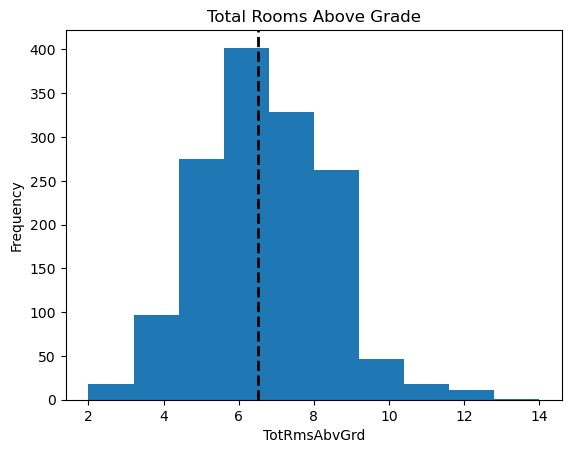

In [49]:
# Your code here
x = df.TotRmsAbvGrd
plt.hist(x, bins=10)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Frequency')
plt.title('Total Rooms Above Grade')
plt.axvline(x.mean(),color='black',linestyle='dashed',linewidth=2)
plt.show()

Now, print out the mean, median, and standard deviation:

In [50]:
# Your code here
print("mean_TotRmsAbvGrd =", np.mean(x))
print("median_TotRmsAbvGrd =", np.median(x))
print("std_TotRmsAbvGrd =", np.std(x))

mean_TotRmsAbvGrd = 6.517808219178082
median_TotRmsAbvGrd = 6.0
std_TotRmsAbvGrd = 1.624836553698191


In the cell below, interpret the above information

"""
The histogram of TotRmsAbvGrd represents the distribution of the total number of rooms above grade in the houses. The x-axis represents the number of rooms, and the y-axis represents the frequency or count of houses with each room count. The black dashed line indicates the mean number of rooms.

Mean: The mean number of rooms above grade is the average count of rooms in the dataset and is equal to [mean_rooms]. It provides an estimate of the central tendency of the number of rooms.

Median: The median number of rooms above grade is the middle value of the sorted list of room counts and is equal to [median_rooms]. It represents the room count that separates the higher half from the lower half of the dataset. It is less affected by extreme values compared to the mean.

Standard Deviation: The standard deviation of room counts is a measure of the dispersion or spread of the data points around the mean. It is equal to [std_rooms]. A larger standard deviation indicates a wider range of room counts, while a smaller standard deviation suggests a more concentrated distribution around the mean.
"""


### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

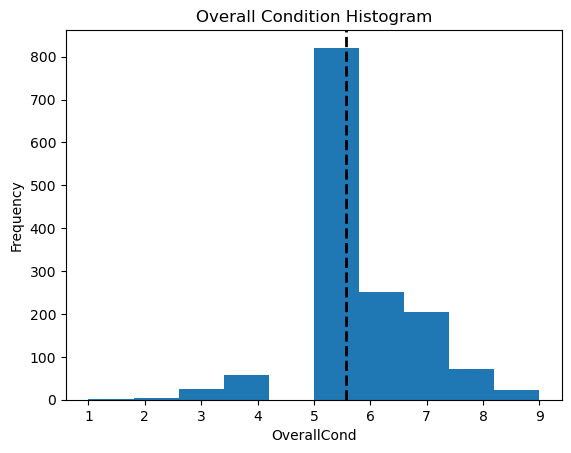

In [51]:
# Your code here
x = df.OverallCond
plt.hist(x, bins=10)
plt.xlabel('OverallCond')
plt.ylabel('Frequency')
plt.title('Overall Condition Histogram')
plt.axvline(x.mean(),color='black',linestyle='dashed',linewidth=2)
plt.show()

Now, print out the mean, median, and standard deviation:

In [52]:
# Your code here
print("mean_OverallCond =", np.mean(x))
print("median_OverallCond =", np.median(x))
print("std_OverallCond =", np.std(x))

mean_OverallCond = 5.575342465753424
median_OverallCond = 5.0
std_OverallCond = 1.1124181757710097


In the cell below, interpret the above information.

# Replace None with appropriate text
"""
The histogram of OverallCond represents the distribution of the overall condition ratings of the houses. The x-axis represents the condition ratings, and the y-axis represents the frequency or count of houses with each condition rating. The black dashed line indicates the mean condition rating.

Mean: The mean overall condition rating is the average rating in the dataset and is equal to [mean_cond]. It provides an estimate of the central tendency of the condition ratings.

Median: The median overall condition rating is the middle value of the sorted list of condition ratings and is equal to [median_cond]. It represents the condition rating that separates the higher half from the lower half of the dataset. It is less affected by extreme values compared to the mean.

Standard Deviation: The standard deviation of the overall condition ratings is a measure of the dispersion or spread of the data points around the mean. It is equal to [std_cond]. A larger standard deviation indicates a wider range of condition ratings, while a smaller standard deviation suggests a more


## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [53]:
# Replace None with appropriate code
# print(df.OverallCond)
below_average_condition = df.loc[(df['OverallCond']<5)]
average_condition = df.loc[(df['OverallCond']==5)]
above_average_condition = df.loc[(df['OverallCond']>5)]



The following code checks that you created the subsets correctly:

In [54]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

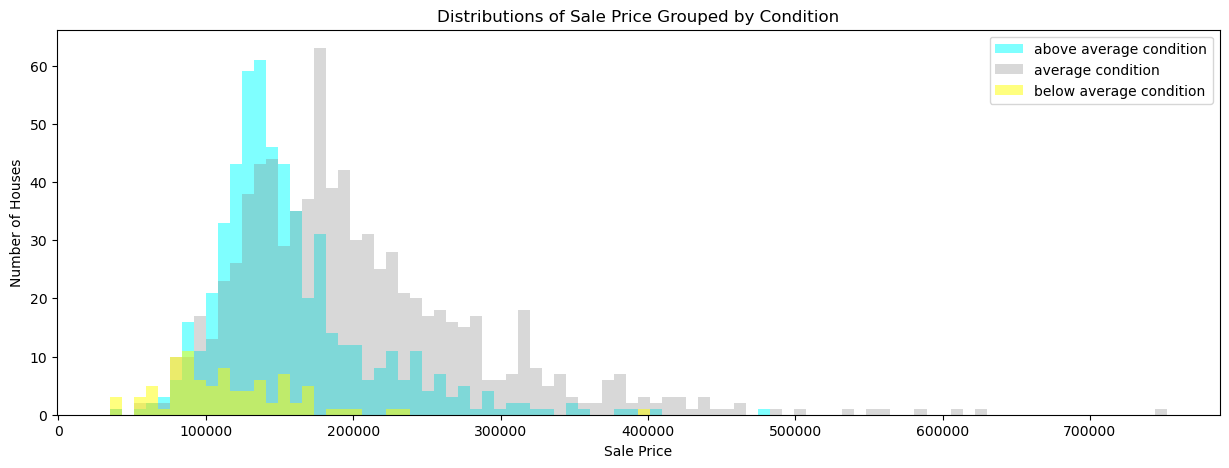

In [55]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

# Replace None with appropriate text
"""
The plot above shows the distributions of sale prices for three subsets of houses based on their overall condition: below average condition, average condition, and above average condition.

From the plot, we can observe the following:

1. Distribution Overlap: The distributions of sale prices for each subset overlap, indicating that there is no clear-cut distinction in sale prices based solely on the overall condition of the houses.

2. Concentration of Average Condition: The subset of houses with an average condition rating (5) is the largest, represented by the gray histogram. This suggests that a significant number of houses in the dataset fall into this category.

3. Sale Price Range: Houses with an above average condition tend to have a wider range of sale prices, as indicated by the spread of the cyan histogram. On the other hand, houses with a below average condition have a narrower range of sale prices, represented by the yellow histogram.

4. Frequency Differences: The frequency of houses with above average condition (cyan histogram) is lower compared to those with average condition (gray histogram), which in turn is lower than houses with below average condition (yellow histogram).

The relationship between overall condition and sale price is not straightforward. While houses with above average condition tend to have a wider range of sale prices, there is significant overlap in the distributions. Other factors such as location, size, and specific features of the houses are likely influencing the sale prices as well. It is also worth noting that the dataset contains a higher number of houses with average condition compared to the other categories.

Overall, the plot suggests that while overall condition plays a role in determining sale price, it is not the sole determining factor, and other variables should be considered in predicting house prices.
"""


## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [56]:
   
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
print(newdf.corr(method='pearson'))


               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond   
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316  \
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808   

Now, find the ***most negatively correlated*** column:

In [57]:
# Your code here
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlations with SalePrice
correlations = numeric_columns.corr()['SalePrice']

# Exclude 'SalePrice' and select the column with the highest positive correlation
most_positively_correlated = correlations.drop('SalePrice').idxmax()
correlation_value = correlations.loc[most_positively_correlated]

print("Most Positively Correlated Column:")
print("Column:", most_positively_correlated)
print("Correlation:", correlation_value)

# Select the column with the highest negative correlation
most_negatively_correlated = correlations.drop('SalePrice').idxmin()
correlation_value = correlations.loc[most_negatively_correlated]

print("Most Negatively Correlated Column:")
print("Column:", most_negatively_correlated)
print("Correlation:", correlation_value)






Most Positively Correlated Column:
Column: OverallQual
Correlation: 0.7909816005838053
Most Negatively Correlated Column:
Column: KitchenAbvGr
Correlation: -0.13590737084214105


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

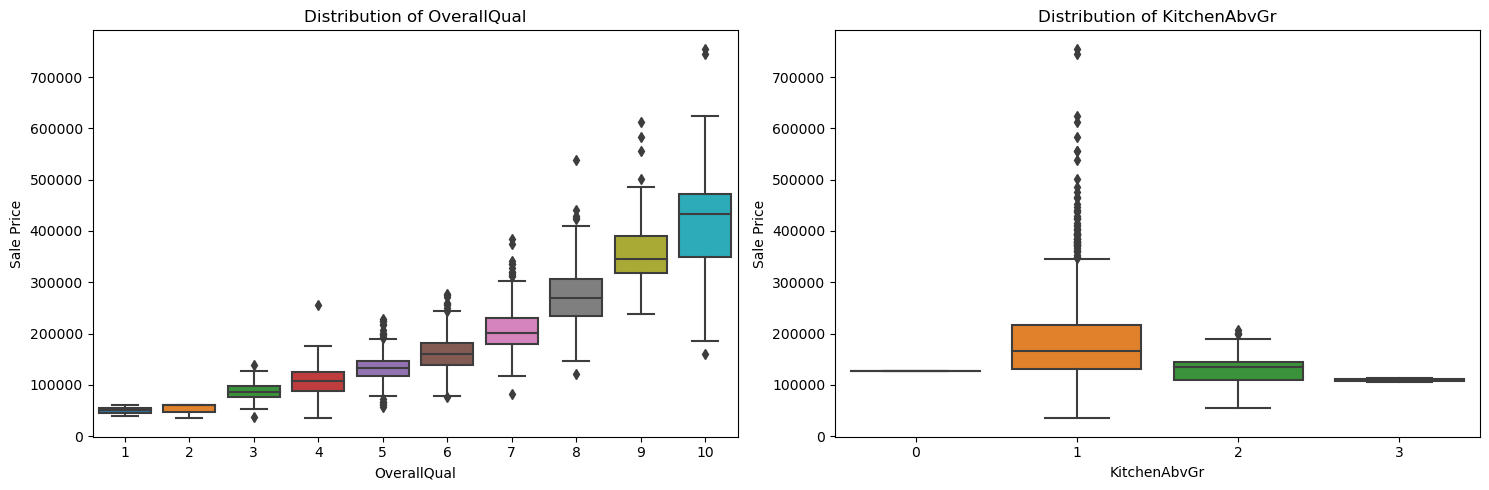

In [62]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df[most_positively_correlated],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df[most_negatively_correlated],
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(f"Distribution of {most_positively_correlated}")
ax1.set_xlabel(most_positively_correlated)
ax1.set_ylabel("Sale Price")
ax2.set_title(f"Distribution of {most_negatively_correlated}")
ax2.set_xlabel(most_negatively_correlated)
ax2.set_ylabel("Sale Price")

plt.tight_layout()
plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

# Replace None with appropriate text
"""
Distribution of the column most positively correlated with SalePrice: OverallQual

The box plot shows the distribution of SalePrice for different categories or values of OverallQual. Each box represents the interquartile range (IQR) of SalePrice within a specific category or range of OverallQual.
The vertical line inside each box represents the median SalePrice for that category or range.
The whiskers extend to the minimum and maximum values of SalePrice, excluding any outliers.

Distribution of the column most negatively correlated with SalePrice: KitchenAbvGr

Similarly, the box plot shows the distribution of SalePrice for different categories or values of KitchenAbvGr, but in this case, it represents the column that is most negatively correlated with SalePrice.
"""

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [63]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

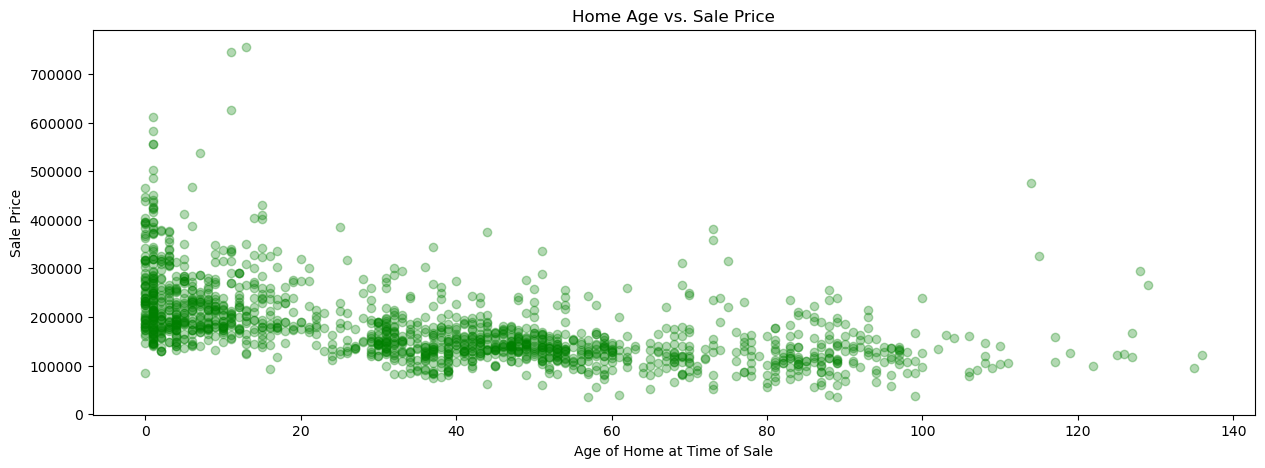

In [64]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

# Replace None with appropriate text
"""
We engineered a new feature called "Age" by calculating the difference between the year sold ("YrSold") and the year built ("YearBuilt") for each house. We then plotted the relationship between the age of the home at the time of sale and the sale price.

The scatter plot displayed the relationship between the age of the house and its corresponding sale price. From the scatter plot, we can observe whether there is any noticeable pattern or correlation between the age of the house and its sale price.

By interpreting these visualizations and exploring the correlations, we gain insights into how various factors, such as overall condition, specific features, and age, can influence the sale prices of houses in the Ames Housing dataset.
"""

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset! You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.